In [13]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/car-data/CarPrice_Assignment.csv
/kaggle/input/car-data/Data Dictionary - carprices.xlsx


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [18]:
df=pd.read_csv('/kaggle/input/car-data/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df.shape

(205, 26)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [25]:
column_object_datatype=df.select_dtypes(include='object').columns.tolist()
column_object_datatype

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [26]:
df_ohe=pd.get_dummies(df[column_object_datatype],dtype='int')

In [27]:
df_ohe.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df1=df.drop(columns=column_object_datatype)

In [30]:
df1.shape

(205, 15)

In [31]:
df_final=pd.concat([df1,df_ohe],axis=1)
df_final.shape

(205, 53)

In [33]:
x=df_final.drop(columns=['price'])
y=df_final.price

In [34]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,random_state=10)


In [35]:
linear_model=LinearRegression()
lasso_model=Lasso()
ridge_model=Ridge()

In [36]:
linear_model.fit(x_train,y_train)
lasso_model.fit(x_train,y_train)
ridge_model.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.455e+08, tolerance: 1.088e+06
  model = cd_fast.enet_coordinate_descent(


Ridge()

In [38]:
linear_pred=linear_model.predict(x_test)
lasso_pred=lasso_model.predict(x_test)
ridge_pred=ridge_model.predict(x_test)

In [39]:
r2_linear=r2_score(y_test,linear_pred)
r2_ridge=r2_score(y_test,ridge_pred)
r2_lasso=r2_score(y_test,lasso_pred)

In [40]:
print(f"Linear Regression Model Score:{r2_linear}.\nLasso Model Score:{r2_lasso}.\nRidge Model Score:{r2_ridge}.")

Linear Regression Model Score:0.840847852129284.
Lasso Model Score:0.8307942377278276.
Ridge Model Score:0.7853054105513557.


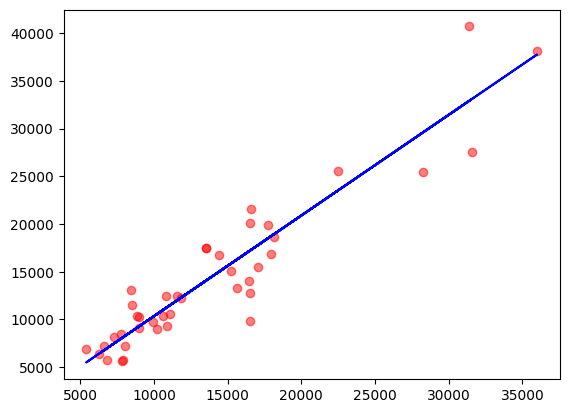

In [42]:
plt.scatter(y_test,linear_pred,alpha=0.5,color='r',label='Actual vs. Predicted')
best_fit_line=np.polyfit(y_test,lasso_pred,1)
plt.plot(y_test,np.polyval(best_fit_line,y_test),color='b',label='Best Fit Line')

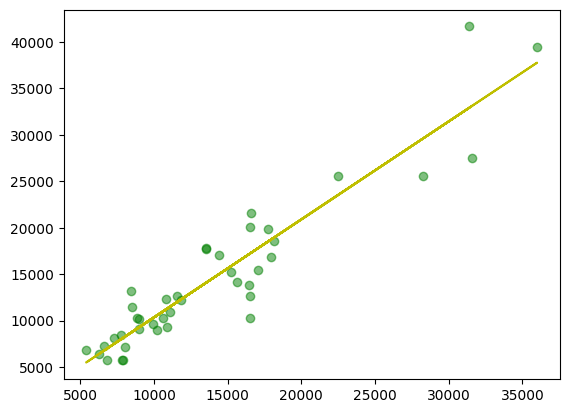

In [44]:
plt.scatter(y_test,lasso_pred,alpha=0.5,color='g',label='Actual vs. Predicted')
best_fit_line=np.polyfit(y_test,lasso_pred,1)
plt.plot(y_test,np.polyval(best_fit_line,y_test),color='y',label='Best Fit Line')

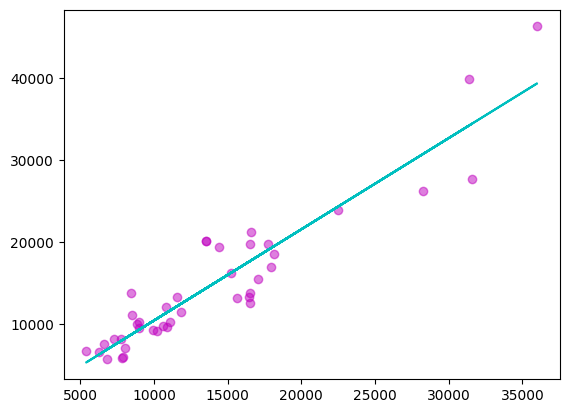

In [53]:
plt.scatter(y_test,ridge_pred,alpha=0.5,color='m',label='Actual vs. Predicted')
best_fit_line=np.polyfit(y_test,ridge_pred,1)
plt.plot(y_test,np.polyval(best_fit_line,y_test),color='c',label='Best Fit Line')

In [55]:
print(f"Linear Regression train dataset score:{linear_model.score(x_train,y_train)}\nLinear Regression test dataset score:{linear_model.score(x_test,y_test)}")
print(f"Lasso train dataset score:{lasso_model.score(x_train,y_train)}\nLinear Lasso test dataset score:{lasso_model.score(x_test,y_test)}")
print(f"Ridge Regression train dataset score:{ridge_model.score(x_train,y_train)}\nRidge Regression test dataset score:{ridge_model.score(x_test,y_test)}")

Linear Regression train dataset score:0.9444806470244721
Linear Regression test dataset score:0.840847852129284
Lasso train dataset score:0.9443878552519597
Linear Lasso test dataset score:0.8307942377278276
Ridge Regression train dataset score:0.9397921754671573
Ridge Regression test dataset score:0.7853054105513557
